# TracerModel
## Conduct some investigations 

#### Basic imports

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Graphics functions
def figsize(scale):
    fig_width_pt = 426.79135 #pt 278.83713 #469.755    # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

# I make my own newfig and savefig functions
def newfig(width,nr=1,nc=1):
    plt.clf()
    fig,ax = plt.subplots(nrows=nr,ncols=nc,figsize=figsize(width))#,dpi=300)
    #fig = plt.figure(figsize=figsize(width))
    #fig.dpi = 300
    #ax = fig.add_subplot(111)
    return fig, ax

def savefig(fig,filename):
    fig.savefig('{}.pgf'.format(filename))
    fig.savefig('{}.pdf'.format(filename))


In [3]:
from Class_Tracer import TracerModel

#### Parameter definitions

In [4]:
xmax  = 100 # length
dx    = 1 # spatial resolution
nx    = xmax//dx # # number of timesteps
tmax  = 1000 # simulation time
dt    = 0.1 # timestep
k     = 0.1 # decay constant, may be of length 1 or nx
u0    = 5 # wind speed

# Assign sources, here as delta-distributions
E = np.zeros(nx)
source_ids = [1,40,70] # indices where sources are located
source_xs = [1,40,70] # x-positions of sources
source_strengths = [1,2,1] # source strengths
E[source_ids] = source_strengths

Params = {
    'xmax':xmax,
    'dx':dx,
    'tmax':tmax,
    'dt':dt,
    'u0':u0,
    'k':k,
    'E':E
}

#### Model initialization and run

In [5]:
# Initialize model
m1 = TracerModel(Params,initialvalue=0)

Done with initialize
Model initialized


/media/matthias/Data/Documents/Utrecht/Courses/Semester 3/SOAC/Project/InverseModelling/Class_Tracer.py:60: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if None in self.P.values():


In [6]:
m1.integrateModel()

Starting model run with method Upwind
Progress is at  0.0 percent
Progress is at  10.0 percent
Progress is at  20.0 percent
Progress is at  30.0 percent
Progress is at  40.0 percent
Progress is at  50.0 percent
Progress is at  60.0 percent
Progress is at  70.0 percent
Progress is at  80.0 percent
Progress is at  90.0 percent
Total time required: 0.12 seconds
Model run finished


#### Plots and Analysis

In [7]:
# coordinate arrays
XX,TT = np.meshgrid(m1.x,m1.time)

<IPython.core.display.Javascript object>


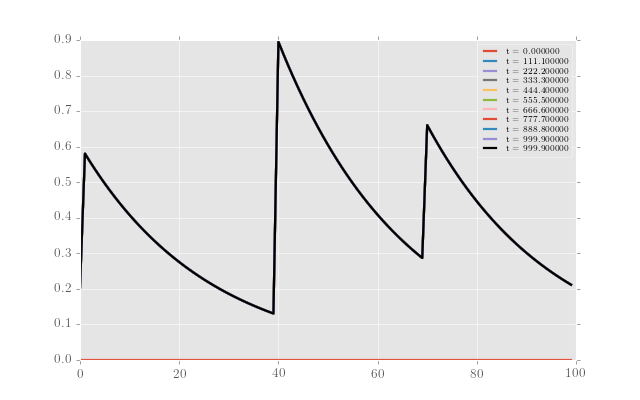

/home/matthias/anaconda3/envs/scientific/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


In [10]:
fig, ax = plt.subplots(1)
for ti in np.linspace(0,m1.time.shape[0]-1,10):
    ax.plot(m1.x,m1.results[ti,:],label='t = %f' % m1.time[ti])
ax.plot(m1.x,m1.results[-1,:],'k',label='t = %f' % m1.time[-1])
ax.legend(loc=0)

<IPython.core.display.Javascript object>


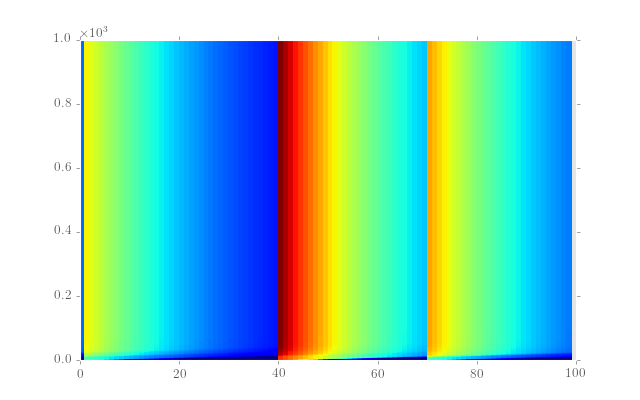

In [10]:
plt.figure()
plt.pcolormesh(XX,TT,m1.results)
#plt.colorbar()

# Sensitivity to dx,dt,k,E,u0

### Sensitivity to dt

<IPython.core.display.Javascript object>


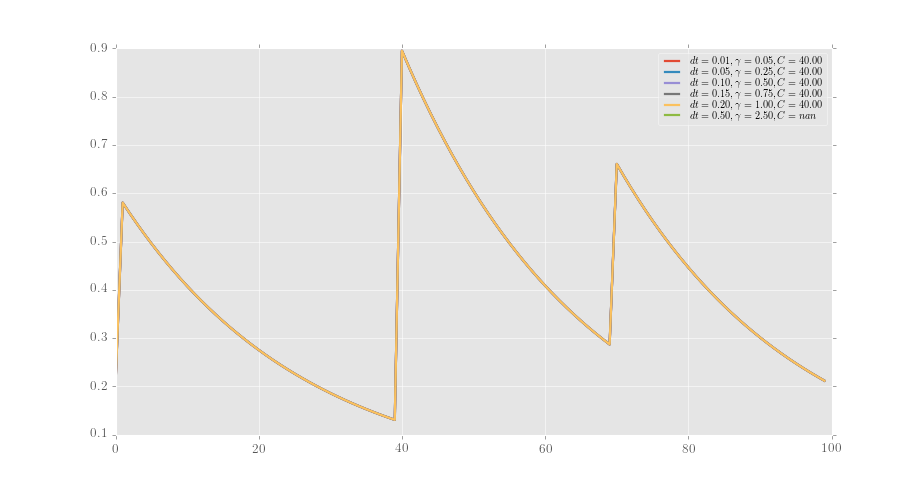

Done with initialize
Starting model run with method Upwind
Progress is at  0.0 percent
Progress is at  10.0 percent
Progress is at  20.0 percent
Progress is at  30.0 percent
Progress is at  40.0 percent
Progress is at  50.0 percent
Progress is at  60.0 percent
Progress is at  70.0 percent
Progress is at  80.0 percent
Progress is at  90.0 percent
Total time required: 1.19 seconds
Model run finished
0.894966529827
Done with initialize
Starting model run with method Upwind
Progress is at  0.0 percent
Progress is at  10.0 percent
Progress is at  20.0 percent
Progress is at  30.0 percent
Progress is at  40.0 percent
Progress is at  50.0 percent
Progress is at  60.0 percent
Progress is at  70.0 percent
Progress is at  80.0 percent
Progress is at  90.0 percent
Total time required: 0.24 seconds
Model run finished
0.894966529827
Done with initialize
Starting model run with method Upwind
Progress is at  0.0 percent
Progress is at  10.0 percent
Progress is at  20.0 percent
Progress is at  30.0 pe

In [11]:
#dt

fig,ax = plt.subplots(1)
#fig,ax = newfig(0.8)

dts = [0.01,0.05,0.1,0.15,0.2,0.5]
for dt in dts:
    m1.updateParameters({'dt':dt})
    m1.integrateModel()
    print(m1.results.max())
    ax.plot(m1.x,m1.results[-1,:],label=r'$dt = %.2f, \gamma = %.2f , C = %.2f$' % (dt,m1.P['gamma'],m1.results[-1,:].sum() * m1.P['dx']))
ax.legend(loc=0,fontsize=9)

#ax.set_title('')

#savefig(fig,'upwind_sensitivity_dt')

In [29]:
E = np.zeros(m1.P['nx'])
for source in source_xs:
    E[np.where(m1.x == source)] = 1

### Sensitivity to dx
Scale source strength with 1/dx to make sure that the integrated forcing is the same

Done with initialize


<IPython.core.display.Javascript object>


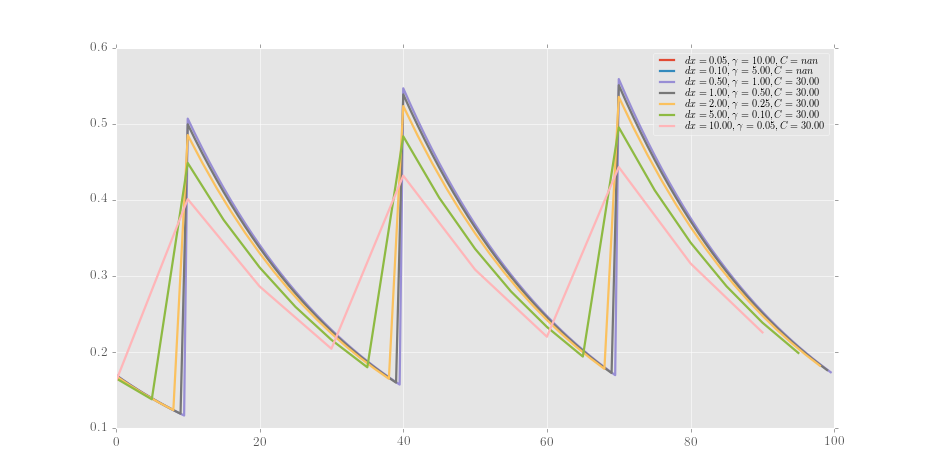

Done with initialize
Done with initialize
Starting model run with method Upwind
Progress is at  0.0 percent
Progress is at  10.0 percent
Progress is at  20.0 percent
Progress is at  30.0 percent
Progress is at  40.0 percent
Progress is at  50.0 percent
Progress is at  60.0 percent
Progress is at  70.0 percent
Progress is at  80.0 percent
Progress is at  90.0 percent
Total time required: 14.81 seconds
Model run finished
nan
Done with initialize
Done with initialize
Starting model run with method Upwind
Progress is at  0.0 percent
Progress is at  10.0 percent
Progress is at  20.0 percent
Progress is at  30.0 percent
Progress is at  40.0 percent
Progress is at  50.0 percent
Progress is at  60.0 percent
Progress is at  70.0 percent
Progress is at  80.0 percent
Progress is at  90.0 percent
Total time required: 3.24 seconds
Model run finished
nan
Done with initialize
Done with initialize
Starting model run with method Upwind
Progress is at  0.0 percent
Progress is at  10.0 percent
Progress i

In [13]:
#dx
m1.updateParameters(Params)
source_xs = np.array([10,40,70])

fig,ax = plt.subplots(1)
#fig,ax = newfig(0.8)

#dxs = [0.01,0.05,0.1,0.15,0.2,0.5]
dxs = [0.05,0.1,0.5,1,2,5,10]
for dx in dxs:
    m1.updateParameters({'dx':dx})
    E = np.zeros(m1.P['nx'])
    for source in source_xs:
        E[np.where(m1.x == source)] = 1 / dx
    m1.updateParameters({'E':E})
    m1.integrateModel()
    print(m1.results.max())
    ax.plot(m1.x,m1.results[-1,:],label=r'$dx = %.2f, \gamma = %.2f , C = %.2f$' % (dx,m1.P['gamma'],m1.results[-1,:].sum() * m1.P['dx']))
ax.legend(loc=0,fontsize=9)

#savefig(fig,'upwind_sensitivity_dx')

### Sensitivity to dx,dt

In [27]:
#dx
m1.updateParameters(Params)
source_xs = np.array([10,40,70])

#fig,ax = plt.subplots(1)
#fig,ax = newfig(0.8)

#dxs = [0.01,0.05,0.1,0.15,0.2,0.5]
dxs = [0.05,0.1,0.5,1,2,5,10]
dts = [0.01,0.05,0.1,0.15,0.2,0.5]

DXS,DTS = np.meshgrid(np.array(dxs),np.array(dts))
mmeans = np.zeros(DXS.shape)
mstds  = np.zeros(DXS.shape)

timeseries = {}
timeseries_loc = 70

for dx in dxs:
    for dt in dts:
        m1.updateParameters({'dx':dx,'dt':dt})
        E = np.zeros(m1.P['nx'])
        for source in source_xs:
            E[np.where(m1.x == source)] = 1 / dx
        m1.updateParameters({'E':E})

        m1.integrateModel()
        print(m1.results[-1,:].max())
        #mmeans[dxs.index(dx),dts.index(dt)] = m1.results[-1,:].mean()
        #mstds[dxs.index(dx),dts.index(dt)] = m1.results[-1,:].std()
        mmeans[dts.index(dt),dxs.index(dx)] = m1.results[-1,:].mean()
        mstds[dts.index(dt),dxs.index(dx)] = m1.results[-1,:].std()
        timeseries_id = np.where(m1.x == timeseries_loc)[0][0]
        timeseries[dx,dt] = m1.results[:,timeseries_id]

#savefig(fig,'upwind_sensitivity_dx')

Done with initialize
Done with initialize
Done with initialize
Starting model run with method Upwind
Progress is at  0.0 percent
Progress is at  10.0 percent
Progress is at  20.0 percent
Progress is at  30.0 percent
Progress is at  40.0 percent
Progress is at  50.0 percent
Progress is at  60.0 percent
Progress is at  70.0 percent
Progress is at  80.0 percent
Progress is at  90.0 percent
Total time required: 154.72 seconds
Model run finished
0.566298272445
Done with initialize
Done with initialize
Starting model run with method Upwind
Progress is at  0.0 percent
Progress is at  10.0 percent
Progress is at  20.0 percent
Progress is at  30.0 percent
Progress is at  40.0 percent
Progress is at  50.0 percent
Progress is at  60.0 percent
Progress is at  70.0 percent
Progress is at  80.0 percent
Progress is at  90.0 percent
Total time required: 31.17 seconds
Model run finished
nan
Done with initialize
Done with initialize
Starting model run with method Upwind
Progress is at  0.0 percent
Progr

In [24]:
import numpy.ma as ma

In [34]:
np.unique(mmeans)
np.unique(mstds)

array([  9.41826535e-02,   9.41826535e-02,   9.41826535e-02,
         9.41826535e-02,   9.41826535e-02,   9.41826535e-02,
         1.05655583e-01,   1.05655583e-01,   1.05655583e-01,
         1.05655583e-01,   1.12413520e-01,   1.12413520e-01,
         1.12413520e-01,   1.12413520e-01,   1.12413520e-01,
         1.12413520e-01,   1.14652721e-01,   1.14652721e-01,
         1.14652721e-01,   1.14652721e-01,   1.15770321e-01,
         1.15770321e-01,   1.15770321e-01,   1.16663529e-01,
         1.16775127e-01,   4.04544646e+40,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan,              nan,
                    nan,              nan])

<IPython.core.display.Javascript object>


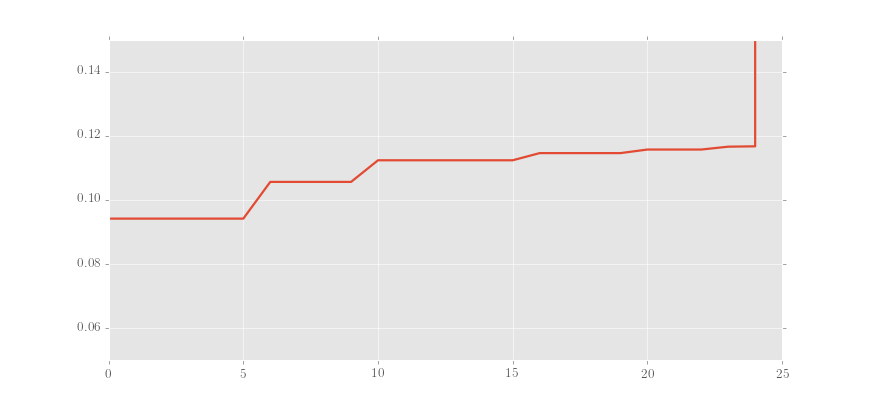

(0.05, 0.15)

In [44]:
plt.figure()
plt.plot(np.unique(mstds))
plt.ylim(0.05,0.15)

In [47]:
np.where(mstds == np.unique(mstds)[23])

(array([0]), array([1]))

In [50]:
(DXS[0,6], DTS[0,6]) , (DXS[0,1], DTS[0,1])

((10.0, 0.01), (0.10000000000000001, 0.01))

<IPython.core.display.Javascript object>


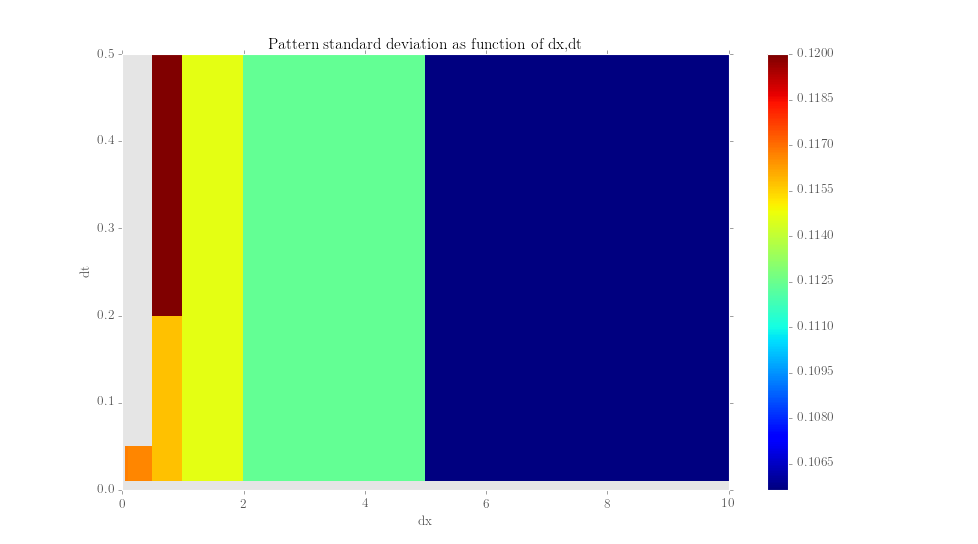

In [69]:
mmeans
plt.figure()
#plt.pcolormesh(DXS,DTS,ma.masked_invalid(mmeans),vmax=1)
plt.pcolormesh(DXS,DTS,ma.masked_invalid(mstds),vmax=0.12)
plt.colorbar()

plt.xlabel('dx')
plt.ylabel('dt')

plt.title('Pattern standard deviation as function of dx,dt')

<IPython.core.display.Javascript object>


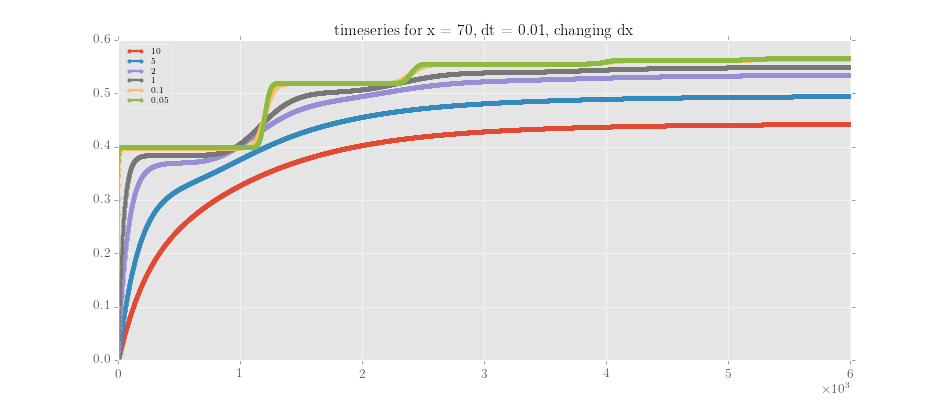

In [67]:
plt.figure()
plt.plot(timeseries[10,0.01],'.-',label='10')
plt.plot(timeseries[5,0.01],'.-',label='5')
plt.plot(timeseries[2,0.01],'.-',label='2')
plt.plot(timeseries[1,0.01],'.-',label='1')
plt.plot(timeseries[0.1,0.01],'.-',label='0.1')
plt.plot(timeseries[0.05,0.01],'.-',label='0.05')

plt.xlim(0,6000)
plt.legend(loc=0)
plt.title('timeseries for x = 70, dt = 0.01, changing dx')

# Further investigations

## Space-dependent decay constant

## Non-delta sources

## Time-dependent wind-speed and/or sources and/or decay constant